# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

# Evaluacion de Desarrollo de Mis Competencias

## Lorenzo Llaguno Mireles A01720567


### IN 2039.4
### Profesor: Jobish Vallikavungal Devassia

#### Monterrey Nuevo León, 4 de septiembre de 2021

### Introduccion
La base de datos que se utilizara para esta evaluacion es una base de datos un tanto diferente a lo ordinario, es una base de datos generada por mi mismo sobre los datos generados en la aplicacion "Health" de iOS. Esta aplicacion guarda mis datos personales sobre mis pasos, kilometros recorridos, pisos escalados y calorias quemadas. Todos estos datos estan medidos por dia. La base de datos inicia el 5 de enero del año 2020 y termina justamente el dia de ayer, 8 de septiembre del 2021. Los datos fueron extraidos con una aplicacion llamada "QS Access", la cual exporta los datos de la aplicacion Health en formato csv.
La base de datos contiene unicamente variables numericas, a excepcion de la fecha. Por lo tanto, podemos visualizar una variedad de datos mediante graficas, tablas y regresiones lineales. El mismo analisis de esta base de datos sirve para darme cuenta de como estoy de salud y asi optimizar mi rendimiento en funcion del tiempo. 

##### Variables críticas, sus comportamientos y relaciones más importantes que existen entre ellas y otras variables
- Date: dia en el que los datos fueron recopilados, se relaciona con todas las otras variables.
- Calories: Calorias quemadas en ese dia. Esta variable se relaciona especialmente con los kilometros, mas adelante veremos porque.
- Km: Kilometros recorridos en el respecto al dia. Esta ligeramente relacionado con los pasos, ya que entre mas pasos, mas kilometros. 
- FlightsClimbed: Pisos subidos en cada cierto dia. Cada piso es igual a 3 metros verticales. 
- Steps: Pasos dados en el dia. Relacionado con los kilometros.
- StepLengthcm: El tamaño promedio de los pasos dados en ese dia, en centimetros. Esta variable fue obtenida dividiendo los kilometro entre los pasos y despues multiplicado por 100,000 para convertirlo en centimetros.

##### Escenarios considerados
1. ¿De que otra variable depende la variable Calories?
2. ¿Existe relacion entre el tamaño del paso y los pisos subidos? Ejemplo: entre mas pisos subidos, mas cortos son los pasos.
3. ¿Cual es el promedio de todas las variables desde que inicio el registro de datos?
4. ¿Como se comporta mi rendimiento en km, pasos y pisos a lo largo del tiempo? ¿Cual es la mejor manera de visualizar esto?

##### Stakeholders
En este caso, los stakeholders son algo limitados:
- Yo mismo: Yo estoy sumamente interesado en saber los datos sobre mi actividad fisica doaria y mi movimiento.
- Cualquier persona intersada en este tipo de datos: Si alguna persona obtuviera su base de datos y aplicara el codigo que yo utilice podria encontrar sus datos y visualizaciones personalizadas. 
- Sector salud: Podria mostrar interes por mi salud y ver como es mi actividad fisica de movilidad diaria.
- Mis doctores/nutriologos: Podrian interesarse por esta informacion ya que les podria permitir personalizar atencion y dietas en los usuarios. 


A continuacion, importamos todo lo necesario para el analisis en python y llamaremos la base de datos a utilizar.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

df = pd.read_csv('HealthEvFinal.csv')

Cambiaremos el nombre de una de las columnas para evitar confusiones con el codigo y hacerlo mas simple.

In [2]:
df = df.rename(columns={'Steps (count)': 'Steps'})

In [3]:
df.head() #obtenemos los primeros 5 renglones de la base de datos, como introduccion

,Date,Calories,Km,FlightsClimbed,Steps,StepLengthcm
0,5-Jan-20,465,10.851,260,15570,70
1,6-Jan-20,57,1.724,10,2796,62
2,7-Jan-20,482,11.235,37,18945,59
3,8-Jan-20,71,2.046,11,3303,62
4,9-Jan-20,58,1.765,10,2833,62


In [4]:
df.describe()

,Calories,Km,FlightsClimbed,Steps,StepLengthcm
count,609.000000,609.000000,609.000000,609.000000,609.000000
mean,177.313629,3.709877,20.927750,5304.095238,68.131363
std,168.793840,2.918215,38.046388,3951.908799,8.917890
min,0.000000,0.008000,0.000000,13.000000,57.000000
25%,55.000000,1.531000,7.000000,2448.000000,63.000000
50%,132.000000,3.059000,10.000000,4700.000000,65.000000
75%,250.000000,5.158000,15.000000,7057.000000,70.000000
max,1301.000000,24.366000,348.000000,32952.000000,105.000000


Continuamos con la descripcion de las variables numericas, para darnos una idea del estado de los datos. Obtenemos datos interesantes como los promedios, minimos y maximos.

**Con la tabla anterior contestamos la pregunta numero 3: ¿Cual es el promedio de todas las variables desde que inicio el registro de datos?**
En la tabla se ve claramente cuales son los promedios de cada variable. Gracias a estos datos me puedo dar una idea de cuanto me muevo en promedio desde el inicio del 2020. Como podemos ver, en promedio me traslado 3.7 km al dia dando 5304 pasos y subiendo 20.9 pisos o 63 metros verticales. Obviamente estos no son los numeros diarios, ya que tengo dias en los que me traslado mas de 10 kilometros y dias que subo mas de 200 pisos, pero estos datos dan una idea muy general de mis movimientos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            609 non-null    object 
 1   Calories        609 non-null    int64  
 2   Km              609 non-null    float64
 3   FlightsClimbed  609 non-null    int64  
 4   Steps           609 non-null    int64  
 5   StepLengthcm    609 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 28.7+ KB


Aqui podemos ver las variables crirticas y su informacion. 

In [6]:
df.corr()

,Calories,Km,FlightsClimbed,Steps,StepLengthcm
Calories,1.000000,0.933567,0.525360,0.913883,0.416415
Km,0.933567,1.000000,0.563876,0.977946,0.445853
FlightsClimbed,0.525360,0.563876,1.000000,0.593713,0.098389
Steps,0.913883,0.977946,0.593713,1.000000,0.269753
StepLengthcm,0.416415,0.445853,0.098389,0.269753,1.000000


Podemos ver en la tabla anterior la correlacion entre las variables del 0 al 1. 1 solamente se muestra entre la misma variable. Entre mas alto sea el numero, mas grande es la correlacion. 

**Con la tabla anterior podemos contestar la pregunta numero 1: ¿De que otra variable depende la variable Calories?**
Enseguida podemos ver que la variable Calories tiene una correlacion casi perfecta con la variable Km. Por lo que intentaremos obtener un modelo de regresion lineal en el siguiente punto. El modelo que se busca es Calories = m(Km) + B

In [7]:
import statsmodels.api as sm
model = sm.OLS.from_formula('Calories ~ Km',
                            data = df)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     4118.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.11e-272
Time:                        01:46:40   Log-Likelihood:                -3362.1
No. Observations:                 609   AIC:                             6728.
Df Residuals:                     607   BIC:                             6737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.0156      3.970     -5.797      0.000     -30.813     -15.218
Km            53.9989      0.841     64.175      0.000      52.346      55.651
==============================================================================
Omnibus:                      198.152   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.116
Skew:                           1.390   Prob(JB):                    1.95e-204
Kurtosis:                       8.408   Cond. No.                         7.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con el analisis realizado aqui arriba, podemos ver que si existe manera de predecir las Calorias respecto a los kilometros recorridos. La ecuacion seria la siguiente: Calories = Km*54 - 23. La R cuadrada es bastante alta y confiable en 0.87, lo cual nos da a entender que el modelo lineal es bueno, mas no perfecto. En el siguiente punto vamos a ver la relacion entre estas dos variables de manera visual mediante un scatterplot. 

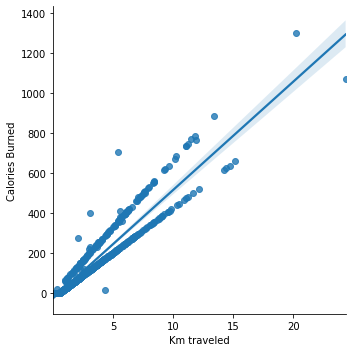

In [8]:
sns.lmplot(x='Km',y='Calories',data=df)
plt.xlabel('Km traveled')
plt.ylabel('Calories Burned')
plt.show()

Podemos ver que existe una muy clara relacion entre las variables. Al parecer, existen dos tendencias diferentes ya que podemos ver claramente dos lineas(ambas positivas) pero con trayectoria ligeramente diferente. Se me ocurre que esto se puede deber a que la aplicacion Health a tenido en su registro dos diferentes datos sobre mi peso en kilogramos a lo largo del registro. En este caso no tenemos disponibles esos datos pero yo creo que esa puede ser la razon por la que vemos dos tendencias ligeramente diferentes.

A continuacion, obtendremos 3 graficas para visualizar mi rendimiento de pisos, pasos y kilometros diarios durante todo el registro. 

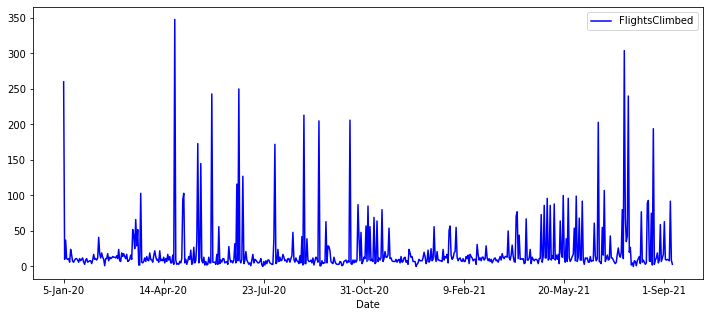

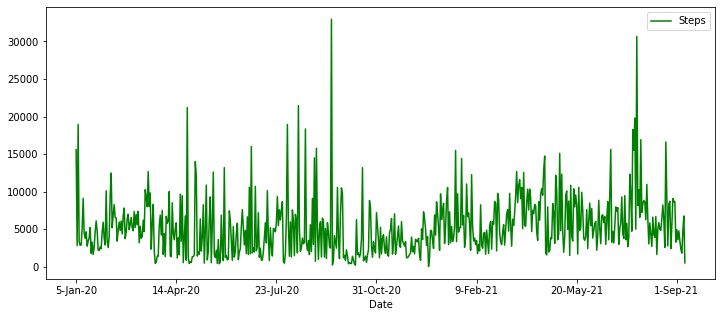

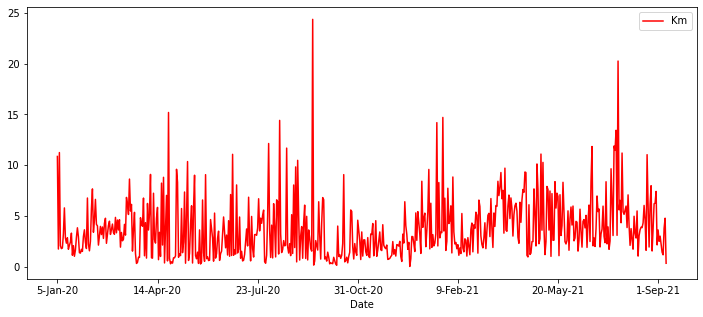

In [9]:
df.plot(x='Date',y='FlightsClimbed',figsize=(12, 5),color='Blue')
df.plot(x='Date',y='Steps',figsize=(12, 5),color='Green')
df.plot(x='Date',y='Km',figsize=(12, 5),color='Red')

Como podemos ver, obtenemos graficas que fluctuan bastante y se ven graficas muy escandalosas. Es muy dificil visualizar tendencias con estas graficas, por lo que intentaremos visualizarlas con el metodo de media mobil. Para esto se va a utilzar el promedio mobil de 30 dias, o un mes, para obtener graficos mas suaves. 

In [10]:
df[ '30day_rolling_avg_FC' ] = df.FlightsClimbed.rolling(30).mean()
df[ '30day_rolling_avg_S' ] = df.Steps.rolling(30).mean()
df[ '30day_rolling_avg_K' ] = df.Km.rolling(30).mean()

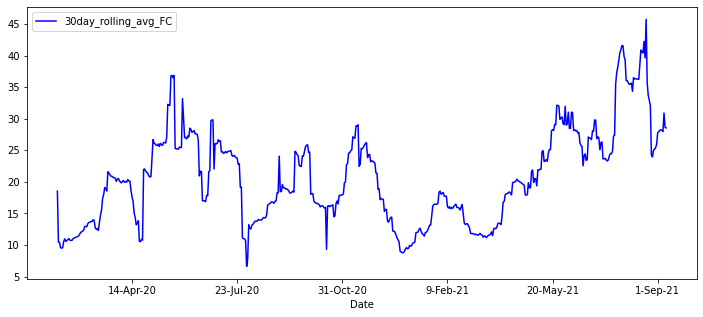

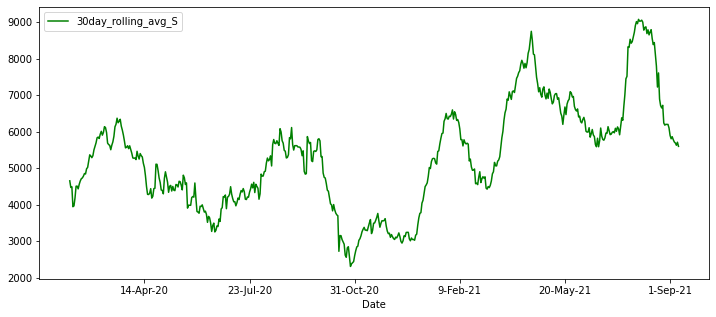

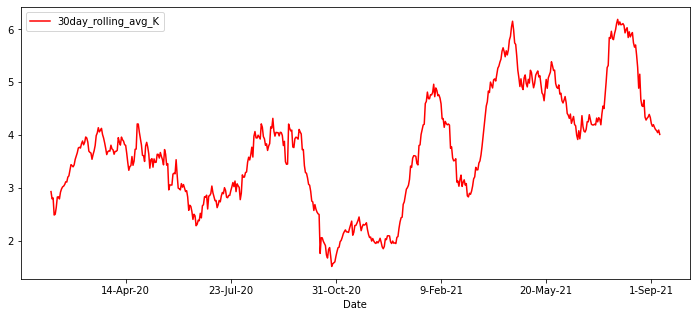

In [11]:
df.plot(x='Date',y='30day_rolling_avg_FC',figsize=(12, 5),color='Blue')
df.plot(x='Date',y='30day_rolling_avg_S',figsize=(12, 5),color='Green')
df.plot(x='Date',y='30day_rolling_avg_K',figsize=(12, 5),color='Red')

Como podemos ver, estas graficas son mas faciles de entender y de usar para ver las tendencias de mi rendimiento. Por esto mismo, **respondemos la pregunta numero 4: ¿Como se comporta mi rendimiento en km, pasos y pisos a lo largo del tiempo? ¿Cual es la mejor manera de visualizar esto?**
Podemos ver como va fluctuando mi actividad fisica durante el tiempo, teniendo como mayor actividad durante los ultimos meses. Vemos que tenemos una caida de actividad alrededor de otoño del 2020 en el cual me lastime. Tambien, concluimos con que la mejor manera de visualizar las tendencias en mi rendimiento y actividad fisica es usando el metodo de media mobil, en el cual tendemos graficas mas suaves usando una media mobil de 30 dias o un mes. 

A continuacion, vamos a revisar si existe alguna relacion entre el tamaño de los pasos y los pisos subidos en dicho dia. Esto lo haremos mediante un scatterplot.

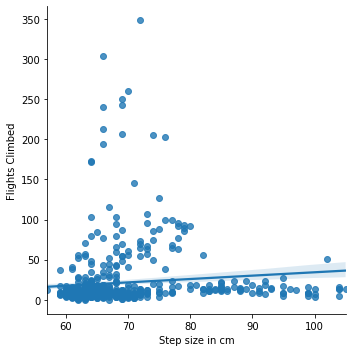

In [12]:
sns.lmplot(x='StepLengthcm',y='FlightsClimbed',data=df)
plt.xlabel('Step size in cm')
plt.ylabel('Flights Climbed')
plt.show()

**Con esto podemos responder la pregunta numero 2: ¿Existe relacion entre el tamaño del paso y los pisos subidos? Ejemplo: entre mas pisos subidos, mas cortos son los pasos.**
En la grafica podemos concluir que no existe relacion alguna entre el tamaño de los pasos y los pisos subidos. Mi teoria era que por ser un dia con elevacion, pudiera ser que los pasos fueran mas cortos pero no es asi.

## Conclusion
Toda la visualizacion de datos anterior es sumamente util para yo darme cuenta de como me muevo en mi vida diaria y tratar de siempre mejorar y optimizar mi vida de actividad fisica. Estos datos se toman cuando subo montañas, salgo a correr, entre otras actividades de movimiento. Por esto, es bueno saber como se relacionan estas variables y como estan mis datos promedio y mis datos en funcion del tiempo.
La visualizaciond de datos con python es sumamente util para un ingerniero como yo, ya que se puede utilizar para presentar datos, predecir y optimizar situaciones. 